In [20]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt


In [21]:
# 1) Import data
housing_df = pd.read_csv('Housing.csv', encoding='ascii')

In [22]:
# Display the first five rows of the dataframe
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [23]:
# Get a summary of the data
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [24]:
# Check for missing values
housing_df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [25]:
# Get statistical summary of the data
housing_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [26]:
# Check the shape of the dataframe
housing_df.shape

(545, 13)

In [27]:
# Preprocess: one-hot encode categoricals, keep all numeric as-is
target_col = 'price'
X = housing_df.drop(columns=[target_col])
y = housing_df[target_col]
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [28]:
# Save the encoded feature columns for reference
feature_cols = X_encoded.columns.tolist()

In [29]:
# 2) Train-test split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [30]:
# 3) Fit Linear Regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
# 4) Evaluate the model using MAE, MSE and R-Squared
y_pred = linreg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mae)
print(mse)
print(r2)

970043.4039201637
1754318687330.6643
0.6529242642153184


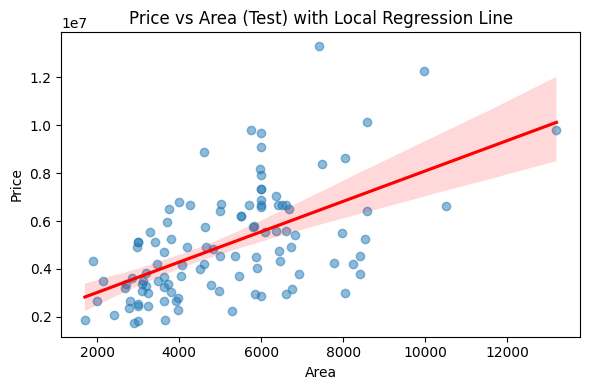

In [32]:
# 5) Plot regression: Use a simple 2D plot for price vs area with regression line on test set
plt.figure(figsize=(6,4))
sns.regplot(x=housing_df.loc[X_test.index, 'area'], y=y_test, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Price vs Area (Test) with Local Regression Line')
plt.xlabel('Area')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [33]:
# Coefficient interpretation: align coefficients with feature names
coef_series = pd.Series(linreg.coef_, index=feature_cols)
coef_sorted = coef_series.sort_values(ascending=False)
print(coef_sorted.head(10))
print(coef_sorted.tail(10))


bathrooms              1.094445e+06
airconditioning_yes    7.914267e+05
hotwaterheating_yes    6.846499e+05
prefarea_yes           6.298906e+05
stories                4.074766e+05
basement_yes           3.902512e+05
mainroad_yes           3.679199e+05
guestroom_yes          2.316100e+05
parking                2.248419e+05
bedrooms               7.677870e+04
dtype: float64
prefarea_yes                       629890.565313
stories                            407476.594985
basement_yes                       390251.176181
mainroad_yes                       367919.947680
guestroom_yes                      231610.037176
parking                            224841.913277
bedrooms                            76778.701634
area                                  235.968805
furnishingstatus_semi-furnished   -126881.817585
furnishingstatus_unfurnished      -413645.062228
dtype: float64


In [34]:
# Save updated CSV with predictions on full dataset using the trained model
full_pred = linreg.predict(X_encoded)
output_df = housing_df.copy()
output_df['predicted_price'] = full_pred
output_df['residual'] = output_df['price'] - output_df['predicted_price']

save_name = 'Housing_with_predictions.csv'
output_df.to_csv(save_name, index=False)

print('Saved file: ' + save_name)

Saved file: Housing_with_predictions.csv
